In [1]:
# 그래프 출력 관련 설정
# 아래 코드는 그래프를 그리고 싶을때 그대로 가져다가 한번 실행시켜주면 편합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style("darkgrid")

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 표시 문제
mpl.rcParams['figure.figsize'] = (15,8)
	
# 한글 폰트 설정
path = 'data/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
# fm._rebuild() => Colab에서는 이 코드도 실행해주세요

In [2]:
# 엑셀 등의 데이터를 편리하게 다룰수 있는 pandas 라이브러리
import pandas as pd

In [3]:
# pandas의 read_csv 함수를 사용해서 'data.csv' 파일을 읽어옵니다.
# 'data.csv'데이터는 한국거래소(KRX)에서 가져온 코스피200 데이터 입니다.
코스피200 = pd.read_csv('data/data.csv', encoding='cp949')

In [4]:
# 데이터가 어떻게 구성되어있는지 3개만 확인해보겠습니다
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/10/05,289.05,0.78,0.27,293.87,294.47,287.44,138907.0,7289051.0,1.528199e+09
1,2022/10/04,288.27,6.91,2.46,286.25,288.96,285.42,120019.0,6053599.0,1.522329e+09
2,2022/09/30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09


In [5]:
# 결측치(셀에 값이 없음)를 제거합니다.
코스피200 = 코스피200.dropna()

# 데이터를 그대로 뿌리면, 최근일자부터 그래프가 그려져서
# 일자별로 정렬해서 데이터프레임을 다시 저장했습니다.
코스피200 = 코스피200.sort_values('일자')

In [6]:
# 그래프의 x축에 쓸 글자(라벨) 만들기
label_x = 코스피200['일자'].loc[[ i for i in range(0, len(코스피200), 365) ]].to_list()

In [22]:
# mpl_finance는 금융 데이터 시각화를 위한 패키지입니다.
import mpl_finance

def show_candle(str_date):
    sub_data = 코스피200[코스피200['일자'] >= str_date]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    # candlestick2_ohlc 함수를 사용하면
    # 많은 사람들이 좋아하는 캔들 차트로도 표시할 수 있습니다.
    mpl_finance.candlestick2_ohlc(ax, sub_data['시가'], sub_data['고가'], sub_data['저가'], sub_data['종가'], width=0.5, colorup='r', colordown='b')

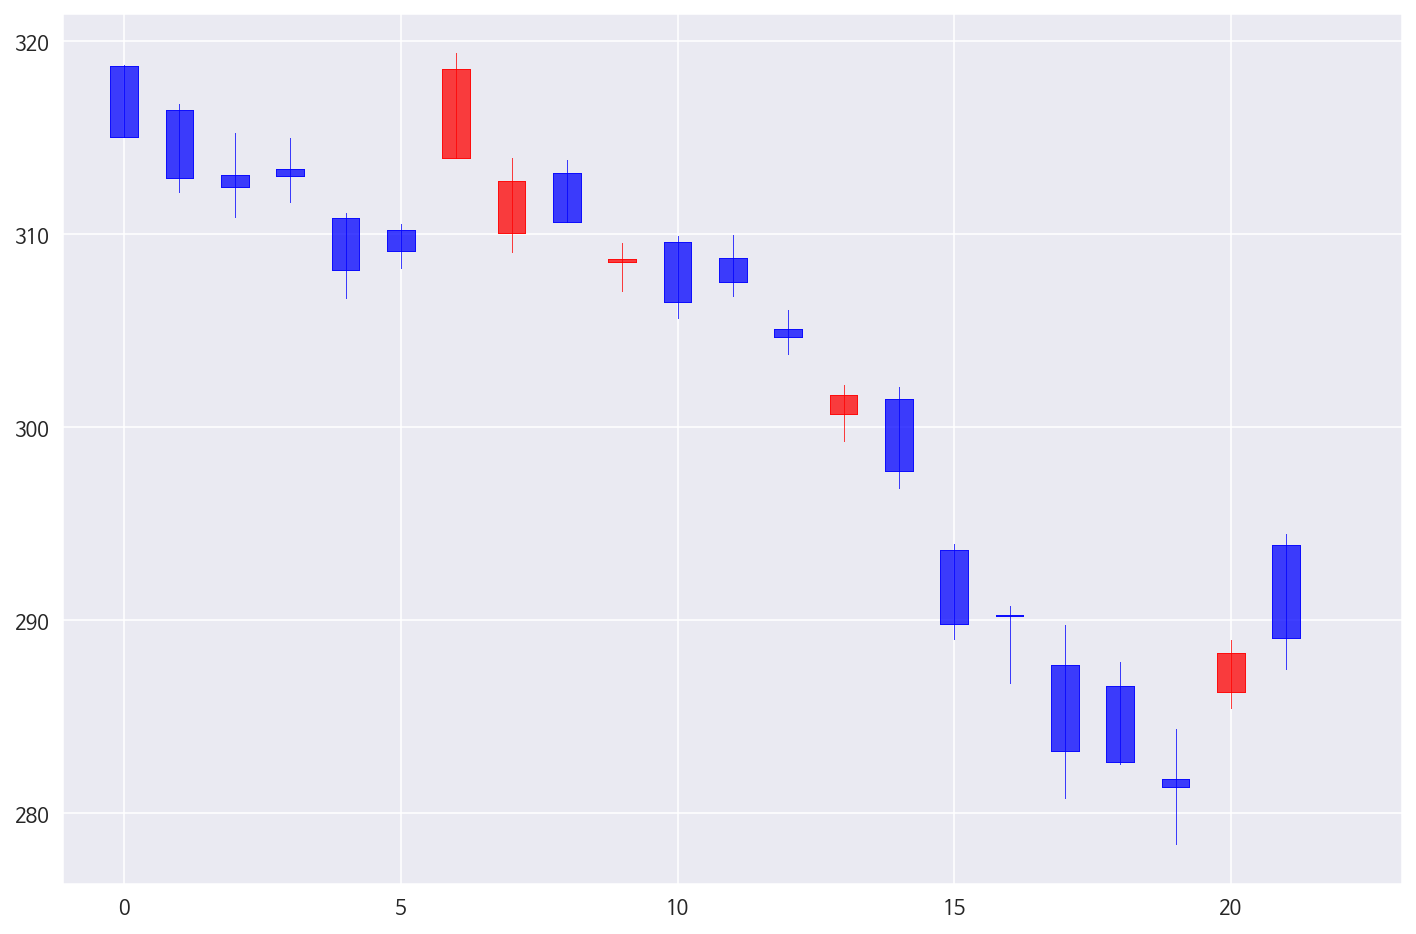

In [23]:
# 캔들 차트를 22년 9월 1일 이후 날짜부터 표시해보겠습니다.
show_candle('2022/09/01')